# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [112]:
x = credit['Balance'].to_numpy()
y = credit['Rating'].to_numpy()

x= x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.40)

In [114]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [115]:
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[0.29742749]]), array([202.35136259]))

### Plot of Training Model (Red) versus Actual Data (Blue)

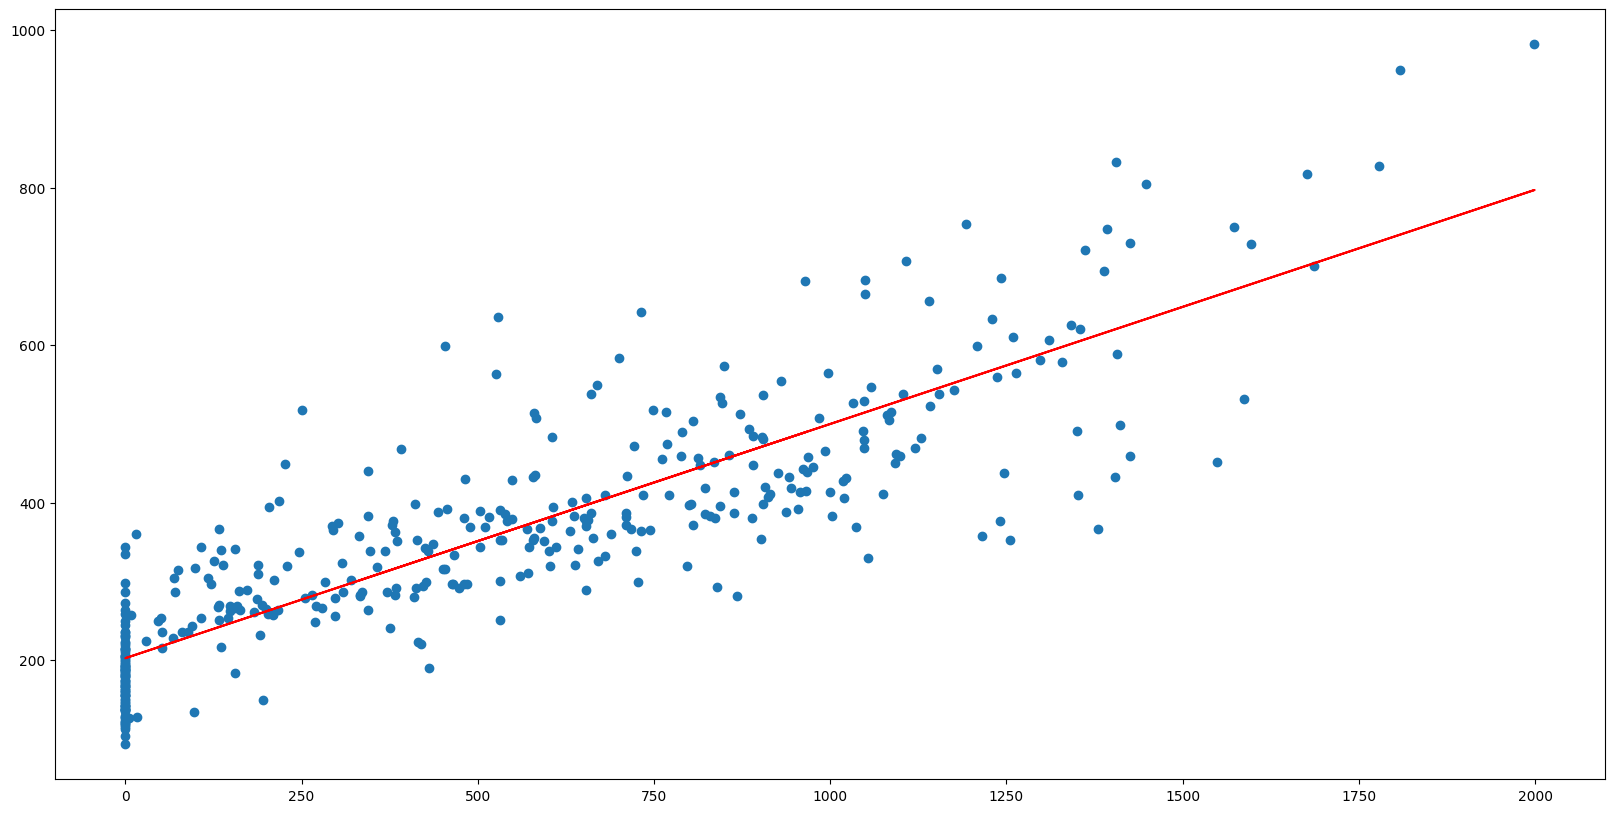

In [116]:
plt.scatter(x, y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c='r') 

### Training Error (MSE, MAE)

In [117]:
(
    metrics.mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_),
    metrics.mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)
)

(6435.394001360988, 59.73485084756984)

### Testing Error (MSE, MAE)

In [118]:
(
    metrics.mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_),
    metrics.mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)
)

(5554.666371103305, 55.07999097492727)

## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classification Report

In [119]:
df = pd.read_csv('../data/College.csv', index_col=False)

In [120]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [121]:
df['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [122]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [123]:
non_numeric_columns = ['Unnamed: 0']
x1 = df.copy().drop(non_numeric_columns, axis = 1)
x1['Private'] = x1.Private.str.contains('Yes').astype(int)
x1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [124]:
x1.Private.value_counts()

Private
1    565
0    212
Name: count, dtype: int64

In [125]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1.drop(['Private'], axis=1),x1.Private, test_size=.20)

In [126]:
x1.shape, x1_train.shape, x1_test.shape

((777, 18), (621, 17), (156, 17))

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
model1 = DecisionTreeClassifier(criterion='entropy')

In [128]:
model1.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy')

In [129]:
test_predictions = model1.predict(x1_test)

### Accuracy Score

In [130]:
accuracy_score(y1_test, test_predictions)

0.9230769230769231

### Confusion Matrix

In [131]:
confusion_matrix(y1_test, test_predictions)

array([[ 34,   3],
       [  9, 110]], dtype=int64)

### Classification Report

In [132]:
print(classification_report(y1_test, test_predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.97      0.92      0.95       119

    accuracy                           0.92       156
   macro avg       0.88      0.92      0.90       156
weighted avg       0.93      0.92      0.92       156



## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [133]:
list(zip(x1.drop(['Private'], axis=1).columns, model1.feature_importances_))

[('Apps', 0.007508158360841993),
 ('Accept', 0.0073207069197507735),
 ('Enroll', 0.055996120071413746),
 ('Top10perc', 0.04299202955266883),
 ('Top25perc', 0.0),
 ('F.Undergrad', 0.4019146762155514),
 ('P.Undergrad', 0.04157049674065695),
 ('Outstate', 0.30405059366229037),
 ('Room.Board', 0.018979755625197606),
 ('Books', 0.0),
 ('Personal', 0.017353442174389035),
 ('PhD', 0.039485948188319145),
 ('Terminal', 0.027007203544034727),
 ('S.F.Ratio', 0.012182409266252097),
 ('perc.alumni', 0.015264108687949503),
 ('Expend', 0.00837435099068376),
 ('Grad.Rate', 0.0)]

In [134]:
x1.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [135]:
#low importance features
drop_columns = ['Apps', 'Accept', 'Enroll', 'Top25perc','Books',
       'Personal', 'Terminal', 'S.F.Ratio', 'Expend']

x2 = x1.copy().drop(drop_columns, axis = 1)
x2.head()

,Private,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,PhD,perc.alumni,Grad.Rate
0,1,23,2885,537,7440,3300,70,12,60
1,1,16,2683,1227,12280,6450,29,16,56
2,1,22,1036,99,11250,3750,53,30,54
3,1,60,510,63,12960,5450,92,37,59
4,1,16,249,869,7560,4120,76,2,15


In [136]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2.drop(['Private'], axis=1),x2.Private, test_size=.20)

In [137]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(x2_train, y2_train)

DecisionTreeClassifier(criterion='entropy')

In [138]:
test2_predictions = model2.predict(x2_test)

### Accuracy

In [139]:
accuracy_score(y2_test, test2_predictions)

0.9487179487179487

### Confusion Matrix

In [140]:
confusion_matrix(y2_test, test2_predictions)

array([[ 41,   3],
       [  5, 107]], dtype=int64)

### Classification Report

In [141]:
print("Test 2", classification_report(y2_test, test2_predictions), "Test 1", classification_report(y1_test, test_predictions))

Test 2               precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.97      0.96      0.96       112

    accuracy                           0.95       156
   macro avg       0.93      0.94      0.94       156
weighted avg       0.95      0.95      0.95       156
 Test 1               precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.97      0.92      0.95       119

    accuracy                           0.92       156
   macro avg       0.88      0.92      0.90       156
weighted avg       0.93      0.92      0.92       156

